First Problem: calculatiing constants

Import and define syms

In [2]:
import sympy
sympy.init_printing()

u_max, u_star, rho_max, rho_star, A, B = sympy.symbols('u_max u_star rho_max rho_star A B')

Set up Equations

In [9]:
eq1 = sympy.Eq( 0, u_max*rho_max*(1 - A*rho_max-B*rho_max**2) )
eq2 = sympy.Eq( 0, u_max*(1 - 2*A*rho_star-3*B*rho_star**2) )
eq3 = sympy.Eq( u_star, u_max*(1 - A*rho_star - B*rho_star**2) )
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
rho_sol = sympy.solve(eq4,rho_star)[0]
B_sol = sympy.solve(eq1,B)[0]
quadA = eq2.subs([(rho_star, rho_sol), (B,B_sol)])
A_sol = sympy.solve(quadA, A)

Solve, A_sol[0] was a negative take A_sol[1]

In [14]:
aval = A_sol[1].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15.0} )
aval

Solve B

In [13]:
bval = B_sol.evalf(subs={rho_max:15.0, A:aval} )
bval

Sod's Shock Tube 

import

In [66]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Parameters

In [67]:
nx = 81
dx = .25
dt = .0002   
gamma = 1.4
t=0

In [68]:
x = numpy.linspace(-10,10,nx)

In [69]:
u = numpy.empty((nx,3))
f = numpy.empty((nx,3))

Initial Conditions

In [70]:
u[0:40,0] = 1.
u[40:81,0] = .125
u[:,1] = 0.
u[0:40,2] = 100
u[40:81,2] = 10

Sanity Checks

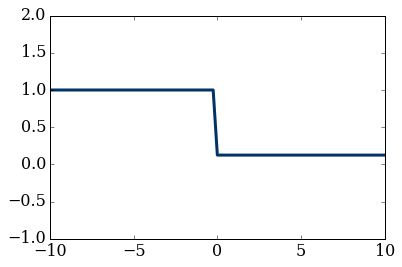

In [42]:
pyplot.plot(x, u[:,0], color='#003366', ls='-', lw=3)
pyplot.ylim(-1,2);

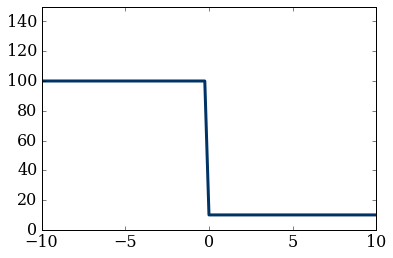

In [44]:
pyplot.plot(x, u[:,2], color='#003366', ls='-', lw=3)
pyplot.ylim(0,150);

Define Function for Flux 

In [75]:
def flux(u,f,gamma):
    f[:,0] = u[:,1]
    f[:,1] = u[:,1]**2/u[:,0] + (gamma-1)*(u[:,2] -0.5*u[:,1]**2/u[:,0])
    f[:,2] = (u[:,2] + (gamma-1) *(u[:,2]-0.5*(u[:,1]**2/u[:,0]) ))*u[:,1]/u[:,0]
    return f

In [79]:
def richtmyer(u,f)

array([  2.08470802e-316,   1.13635099e-322,   6.90758795e-310,
         2.08472857e-316,   0.00000000e+000,   0.00000000e+000,
         8.16968380e-312,   4.94065646e-324,   0.00000000e+000,
         6.90758202e-310,   1.69759663e-313,   6.90758202e-310,
         6.90752070e-310,   0.00000000e+000,   6.90758202e-310,
         1.69759663e-313,   6.90758783e-310,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   6.90755436e-310,
         6.90758202e-310,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   2.37645576e-321,   6.90758763e-310,
         6.90755435e-310,   6.90755435e-310,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   6.90758206e-310,
         0.00000000e+000,   6.90755435e-310,   6.90755435e-310,
         6.90756569e-310,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   6.90755435e-310,   6.90755435e-310,
         6.90755435e-310,   2.42092166e-322,   0.00000000e+000,
         5.77068674e-321,               